# Credit Card Fraud Detection
Team Member:

DEVY RATNASARI (**309)

GOPIKA SHAJI (**568)

OLUWOLE AYODELE (**448)

PRIYANKA SINGH (**824)

SAURAV BISHT (**875)

ABSTRACT
Our objective is to Implement multiple Machine Learning Models on a Dataset that contains information regarding Credit Card Transactions and try to Predict whether a New Transaction is Fraudulent or Not. During this project, we will train these models and tune them to get the best accuracy. We will be evaluating the model using several metrics and will pick the best performing model out of all.
With the new trend of Online Shopping and Online Platforms for Transactions, the number of Credit Card based Transactions increased tremendously. However, there have been a lot of cases where illegal use of Debit/Credit Cards for making Fraudulent Transactions. Credit card companies have been paying a lot of attention to providing the best service for their customers by avoiding such scams occurring in the transactions. Machine Learning Models can work well in detecting such Fraudulent actions when they are trained on a large quantity of historical data.

Credit card fraud is “the unauthorized use of a credit or debit card or similar payment tool to fraudulently obtain money or property.” Credit card fraud detection has become one of the most important aspects in this era of digital payments.

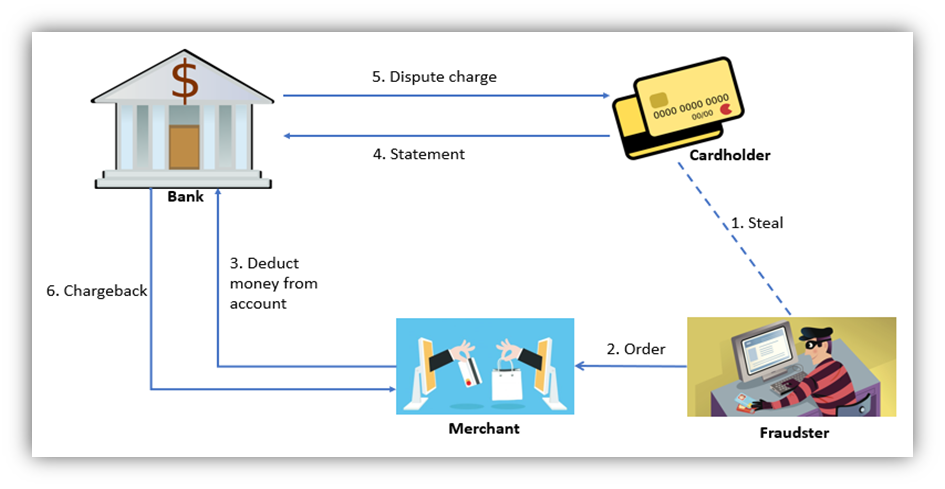

We will use 7 different machine learning algorithms to classify transactions into fraud vs non-fraud. To solve this problem statement, we will be using the following approach:

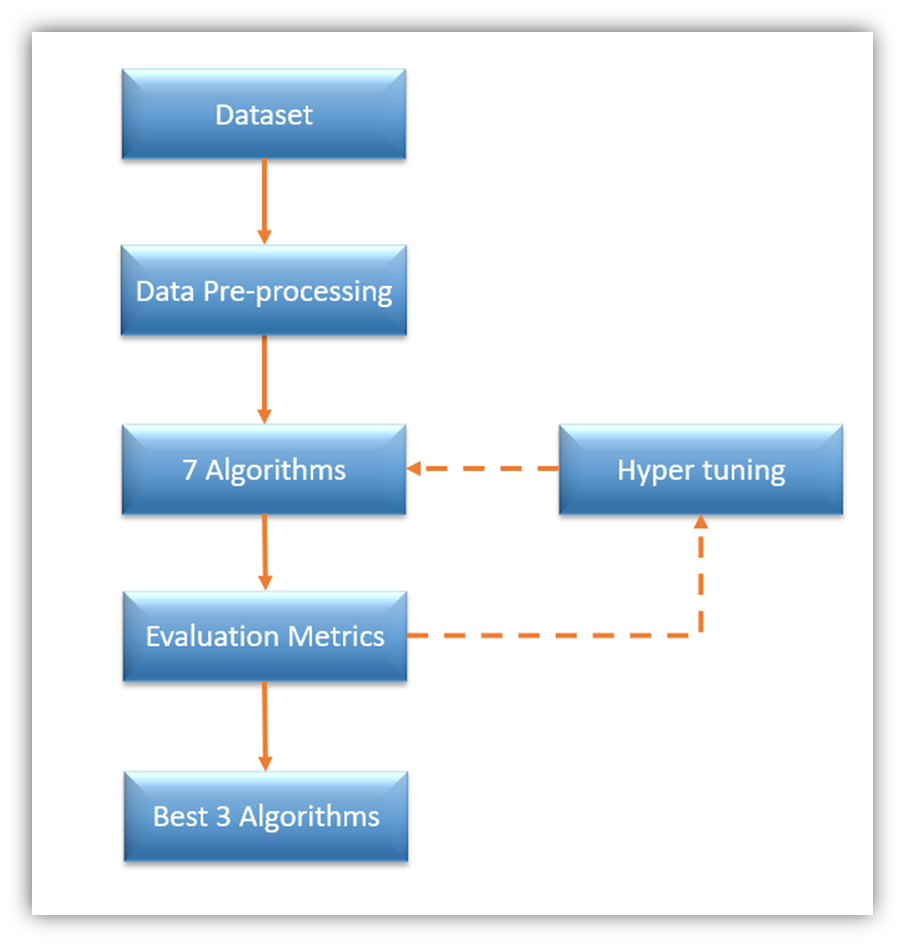

We got the dataset from Kaggle and it has been split into 2 files, Train and Test.
We will combine 2 dataset to see the total numbers of data and the balance percentage before split it into train and test dataset.

Also, we can see the sample of the data from the first 5 rows, there are two class value, fraud or not fraud which is a classification problem.

In [1]:
#import library that will be used for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold


# EDA & Data Preprocessing

In [2]:
#import the train dataset
dtrain = pd.read_csv('fraudTrain.csv')

#import the test dataset
dtest = pd.read_csv('fraudTest.csv')

#combine 2 datasets into 1
fullset = pd.concat([dtrain, dtest])

#delete the original data before merge to save memory
del dtrain, dtest

#see the structure of data
print(fullset.shape)
print(fullset.info())

#print sample of data(the first 5 rows)
fullset.head()

(1852394, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fr

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
#list for metrics scoring
score= []

In [4]:
#convert dob to age
fullset['dob'] = pd.to_datetime(fullset.dob)
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

fullset['Age']=fullset['dob'].apply(lambda x: from_dob_to_age(x))

In [5]:
#convert trans_date_time to month and year
fullset['trans_date_trans_time'] = pd.to_datetime(fullset['trans_date_trans_time']).dt.to_period('m')
fullset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Age
0,0,2019-01,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34
1,1,2019-01,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,43
2,2,2019-01,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60
3,3,2019-01,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55
4,4,2019-01,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36


In [6]:
#check if any null value in the dataset
fullset.isna().sum()
#there is no null value in the dataset

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Age                      0
dtype: int64

In [7]:
#check for unique values in the dataset.
for col in fullset:
    uValue = np.unique(fullset[col])
    rValue = len(uValue)
    if rValue < 50:
        print('Unique values {} total {} --{}'.format(col, rValue, uValue))
    else:
        print('Unique Value {} -- {}'.format(col, rValue))

Unique Value Unnamed: 0 -- 1296675
Unique values trans_date_trans_time total 24 --[Period('2019-01', 'M') Period('2019-02', 'M') Period('2019-03', 'M')
 Period('2019-04', 'M') Period('2019-05', 'M') Period('2019-06', 'M')
 Period('2019-07', 'M') Period('2019-08', 'M') Period('2019-09', 'M')
 Period('2019-10', 'M') Period('2019-11', 'M') Period('2019-12', 'M')
 Period('2020-01', 'M') Period('2020-02', 'M') Period('2020-03', 'M')
 Period('2020-04', 'M') Period('2020-05', 'M') Period('2020-06', 'M')
 Period('2020-07', 'M') Period('2020-08', 'M') Period('2020-09', 'M')
 Period('2020-10', 'M') Period('2020-11', 'M') Period('2020-12', 'M')]
Unique Value cc_num -- 999
Unique Value merchant -- 693
Unique values category total 14 --['entertainment' 'food_dining' 'gas_transport' 'grocery_net' 'grocery_pos'
 'health_fitness' 'home' 'kids_pets' 'misc_net' 'misc_pos' 'personal_care'
 'shopping_net' 'shopping_pos' 'travel']
Unique Value amt -- 60616
Unique Value first -- 355
Unique Value last -- 486

From the null value we will combine:

misc_net and misc_pos into misc

grocery_pos and grocery_net into grocery

shopping_net and shopping_pos into shopping

In [8]:
#combine categories
fullset = fullset.replace({'misc_net':'misc', 'misc_pos':'misc',
                           'grocery_pos':'grocery', 'grocery_net':'grocery',
                           'shopping_net':'shopping', 'shopping_pos':'shopping'})
fullset.category.unique()

array(['misc', 'grocery', 'entertainment', 'gas_transport', 'shopping',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

Text(0.5, 1.0, 'Fraud growths')

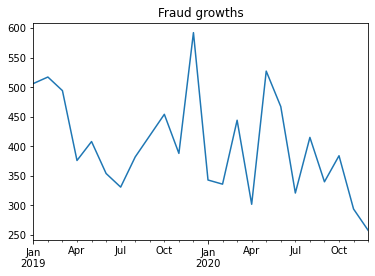

In [9]:
#plot line chart for fraud
fraud = fullset.query('is_fraud == 1')  
fraud['trans_date_trans_time'].value_counts().sort_index().plot()
plt.title('Fraud growths')

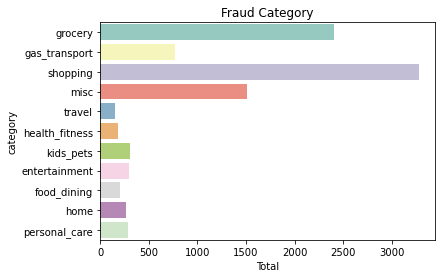

In [10]:
#plot categories which most fraud happening
sns.countplot(y=fraud.category, data=fraud, palette = 'Set3')
plt.title('Fraud Category')
plt.xlabel('Total')
plt.show()

From the graph above, we can see most of fraud happening in shopping and grocery categories

In [11]:
#number of data of for is_fraud classification
print(fullset['is_fraud'].value_counts())

0    1842743
1       9651
Name: is_fraud, dtype: int64


as we can see from the total of 1852394 rows,
it only 9651 classified as fraud meaning the data is imbalanced.

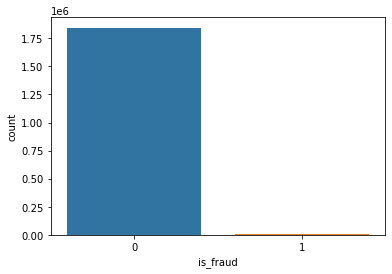

In [12]:
#visual the imbalanced data using bar chart
sns.countplot(x = 'is_fraud', data = fullset)
plt.show()

In [13]:
#checking the percentage comparison for the imbalanced data

Fraud = len(fullset[fullset['is_fraud']==1])
NoFraud = len(fullset[fullset['is_fraud']==0])

print('No Fraud Percentage {}'.format((NoFraud/(NoFraud+Fraud))*100))
print('Fraud Percentage {}'.format((Fraud/(NoFraud+Fraud))*100))

No Fraud Percentage 99.47899852839083
Fraud Percentage 0.5210014716091717


the imbalanced ratio is 99.47:0.52 which we can categorised as extreme imbalanced.
The machine trained may yield high overall prediction accuracy since the most likely predict most samples belongin to the majority class.

we will perform random under-sampling with imblearn for this problem

We will be converting the string data to int, because it won't work with string and we want to check the correlation between every column.
After we transform all of the data into int, we will be checking the correlation between each column using heatmap from seaborn and feature selection.

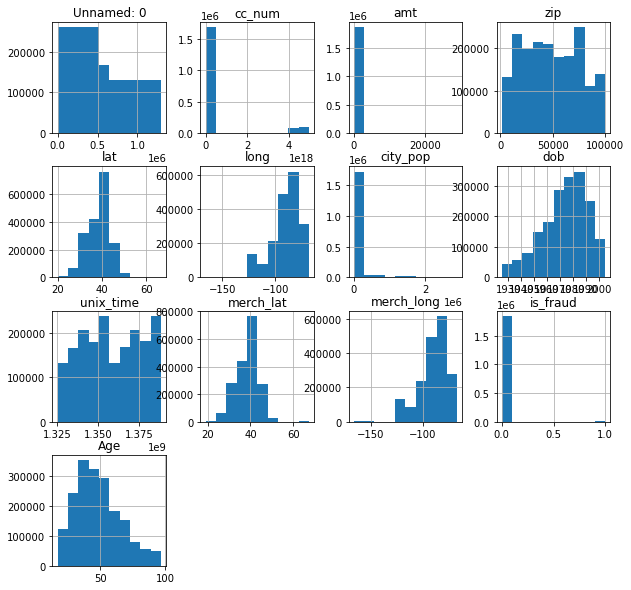

In [14]:
#plotting the data distribution
p = fullset.hist(figsize = (10,10))

In [15]:
#apply label encoder to the dataset and put in the new dataset
newset = fullset.apply(LabelEncoder().fit_transform)

#print dataset after label encoding
print(newset.head(5))

#delete fullset since we transform the data with label encoder to newset
del fullset

   Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0           0                      0     454       514         7    397   
1           1                      0      44       241         3  10623   
2           2                      0     241       390         0  21911   
3           3                      0     519       360         2   4400   
4           4                      0     377       297         7   4096   

   first  last  gender  street  ...  long  city_pop  job  dob  trans_num  \
0    164    18       0     576  ...   704       462  372  791      80326   
1    312   161       0     439  ...    62        43  431  619     227462   
2    116   386       1     610  ...    90       491  308  309    1169030   
3    165   468       1     945  ...    93       370  330  405     777909   
4    339   153       1     422  ...   764        22  116  746    1186866   

   unix_time  merch_lat  merch_long  is_fraud  Age  
0          0     550600     1223201    

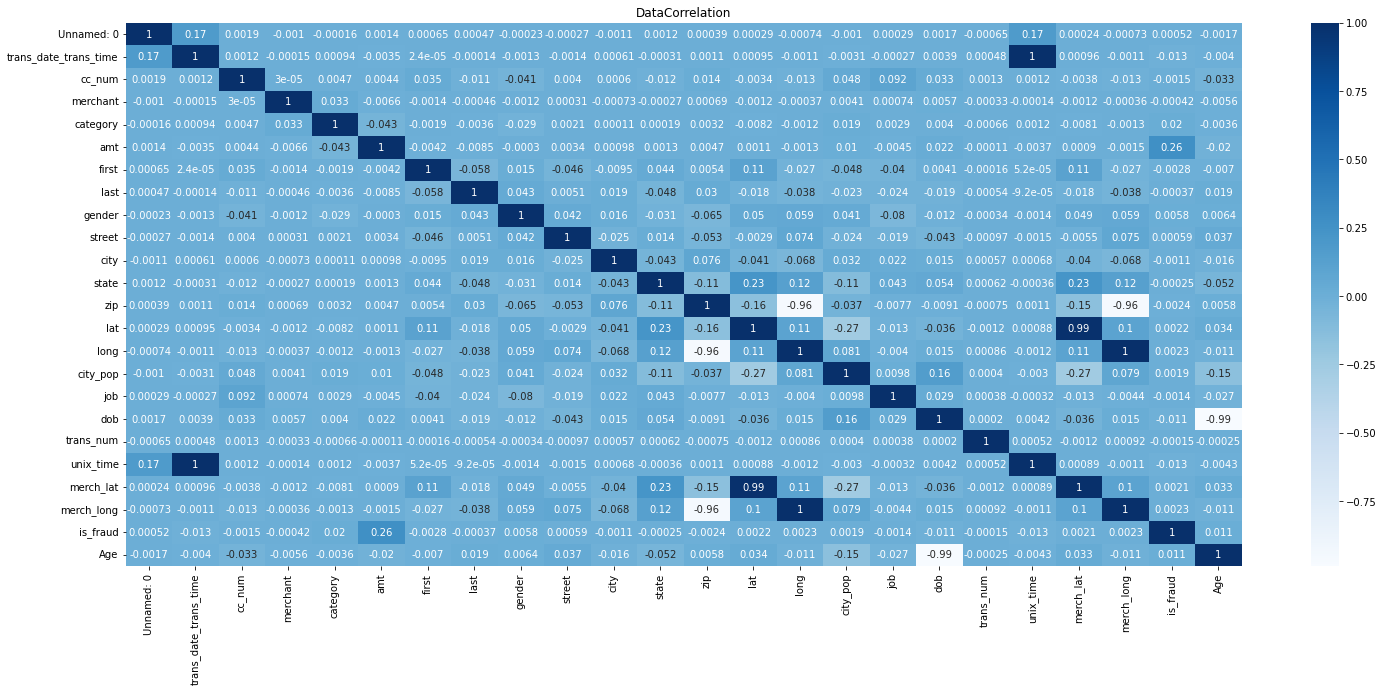

In [16]:
fig, ax = plt.subplots(figsize=(25,10))  
sns.heatmap(newset.corr(), annot = True, ax=ax, cmap = 'Blues')
plt.title("DataCorrelation")
plt.show()

In [17]:
#we will be dropping is_fraud because we will use it as our y axis
dropvar = ['is_fraud','Unnamed: 0', 'first', 'last', 'dob', 'trans_num', 'merch_lat', 'merch_long', 'zip'] 
#create our dependent variables
x = newset.drop(dropvar, axis=1).copy()
print(x.head())

   trans_date_trans_time  cc_num  merchant  category    amt  gender  street  \
0                      0     454       514         7    397       0     576   
1                      0      44       241         3  10623       0     439   
2                      0     241       390         0  21911       1     610   
3                      0     519       360         2   4400       1     945   
4                      0     377       297         7   4096       1     422   

   city  state  lat  long  city_pop  job  unix_time  Age  
0   532     27  295   704       462  372          0   16  
1   619     47  978    62        43  431          1   25  
2   474     13  747    90       491  308          2   42  
3    84     26  944    93       370  330          3   37  
4   217     45  405   764        22  116          4   18  


In [18]:
#create our independent variables
y = newset['is_fraud'].copy()
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64


Since we have extreme imbalanced data, we will performing random under sampler, so the total data that we will used the same as the minimum data that we have. For our case will be 9651 same as the total fraud that we got.

# Random Under Sampler

In [19]:
#import library for random under sampler
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import collections
from collections import Counter

#calling the method and fit it with x and y data
unSampler = RandomUnderSampler(random_state=42, replacement=True)
xund, yund = unSampler.fit_resample(x,y)

print('original dataset shape:', Counter(y))
print('resample dataset shape', Counter(yund))

#delete x and y axis before under sampler to save memory
del x, y 

original dataset shape: Counter({0: 1842743, 1: 9651})
resample dataset shape Counter({0: 9651, 1: 9651})


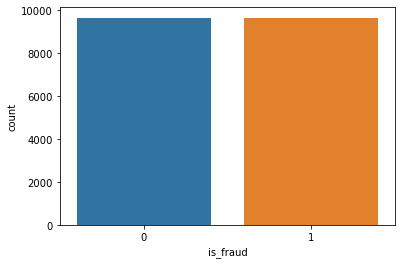

In [20]:
#visual the balanced data using bar chart
underfraud = pd.DataFrame(yund)
sns.countplot(x = 'is_fraud', data = underfraud)
plt.show()

In [21]:
print(xund)
print(yund)

       trans_date_trans_time  cc_num  merchant  category    amt  gender  \
0                          2     154       273         2   6666       0   
1                          9     436       684         8   4679       0   
2                          2     425       532         4   2317       1   
3                         19     536       593         9    130       1   
4                          4     707       265         7   5069       0   
...                      ...     ...       ...       ...    ...     ...   
19297                     23     415       670         9  55923       1   
19298                     23     415       349         9  52734       1   
19299                     23     415       443         9  55899       1   
19300                     23     415        29         3  28400       1   
19301                     23     415       281         7  50524       1   

       street  city  state  lat  long  city_pop  job  unix_time  Age  
0         216   137     34  

We split the data into train and test and then scale them to avoid data leakage that occurs when information about the training dataset corrupts or influences the testing dataset.

# Data Split to Train and Test

In [22]:
#split data to training and test
from sklearn.svm import SVC

#split the data before scaling
xtrain, xtest, ytrain, ytest = train_test_split(xund, yund, test_size=0.3, random_state=42)

#scaling the data
mmscale = MinMaxScaler()
xtrain = mmscale.fit_transform(xtrain)
xtest = mmscale.fit_transform(xtest)

# Function for metrix calculation

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import log_loss, confusion_matrix, roc_auc_score, roc_curve

#plot the confusion matrix
def cm(algo): #it need the model variable after fitting the data
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ytest, algo.predict(xtest)),
                           display_labels=algo.classes_)
    disp.plot()
    plt.show()

In [24]:
#function to print metrics score
def prints(cmatrix, acctest, acctrain, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain):
    print("Confusion Matrix Accuracy Score = {:.2f}%\n".format(cmatrix))
    print("Accuracy Score: Training -> {:.2f}% Testing -> {:.2f}%\n".format(acctrain, acctest))
    print("Log Loss Training-> {} Testing -> {}\n".format(logtrain, logtest))
    print('Precision class 1: {:.2f}%\nPrecision class 0: {:.2f}%'.format(precision1, precision0))
    print('Recall class 1: {:.2f}%\nRecall class 0: {:.2f}%'.format(recall1, recall0))
    print('F1: {:.2f}%'.format(f1)) 
    print('ROC AUC Training-> {:.2f}% Testing-> {:.2f}%'.format(roctrain, roctest))
    #auc_curve(roctest, roctrain,  fpr_test, tpr_test, fpr_train, tpr_train)

In [25]:
#function add metrics score to list
def insertlist(name, cmatrix, acctest, acctrain, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain):
    score.append([name, cmatrix, acctest, acctrain, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain])

In [26]:
# Roc Curve Characterics
def auc_plot(algo):
    #create AUC curve
    test_prob = algo.predict_proba(xtest)[::,1]
    train_prob = algo.predict_proba(xtrain)[::,1]
    roctest = roc_auc_score(ytest, test_prob)
    roctrain = roc_auc_score(ytrain, train_prob)
    
    fpr_test, tpr_test, _ = roc_curve(ytest,  test_prob)
    fpr_train, tpr_train, _ = roc_curve(ytrain,  train_prob)
    plt.title("Area Under Curve")
    plt.plot(fpr_test,tpr_test,label="AUC Test="+str(roctest))
    plt.plot(fpr_train,tpr_train,label="AUC Train="+str(roctrain))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

In [27]:
#metrix function 
def scr(algo, name): #algo = model, name = string of the model name
    predtest = algo.predict(xtest)
    predtrain = algo.predict(xtrain)
    
    #confussion matrix percentage
    tn, fp, fn, tp = confusion_matrix(ytest, predtest).ravel()
    tst = ytest.count()
    cmatrix = ((tn + tp)/tst)*100    

    #accuracy score
    acctest = (accuracy_score(ytest, predtest))*100
    acctrain = (accuracy_score(ytrain, predtrain))*100

    #log loss
    logtest = log_loss(ytest,predtest)
    logtrain = log_loss(ytrain,predtrain)
            
    #classification report
    precision1 = (tp / (tp+fp))*100
    precision0 = (tn/(tn+fn))*100
    recall1 = (tp/(tp+fn))*100
    recall0 = (tn/(tn+fp))*100
    f1 = 2*(precision1 * recall1)/(precision1 + recall1)

    #roc auc score
    test_prob = algo.predict_proba(xtest)[::,1]
    train_prob = algo.predict_proba(xtrain)[::,1]
    roctest = (roc_auc_score(ytest, test_prob))*100
    roctrain = (roc_auc_score(ytrain, train_prob))*100

    insertlist(name, cmatrix, acctest, acctrain, logtest, logtrain, precision1,
               precision0, recall1, recall0, f1, roctest, roctrain)      
    #print metrics score
    return prints(cmatrix, acctest, acctrain, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain)

# Algo Implementation - SVM

In [28]:
#build SVM classification
SVM1 = SVC(random_state = 42, probability=True)
SVM1.fit(xtrain, ytrain)

SVC(probability=True, random_state=42)

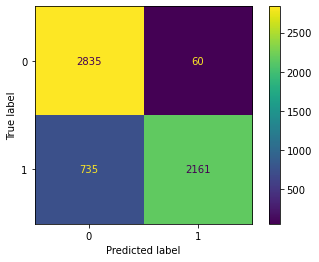

In [29]:
#calling cm function to plot the confusion matrix
cm(SVM1)

In [30]:
#calling function scr to print the metrix score
scr(SVM1, 'SVM1')

Confusion Matrix Accuracy Score = 86.27%

Accuracy Score: Training -> 86.97% Testing -> 86.27%

Log Loss Training-> 4.499173770228142 Testing -> 4.741560215817615

Precision class 1: 97.30%
Precision class 0: 79.41%
Recall class 1: 74.62%
Recall class 0: 97.93%
F1: 84.46%
ROC AUC Training-> 92.26% Testing-> 88.76%


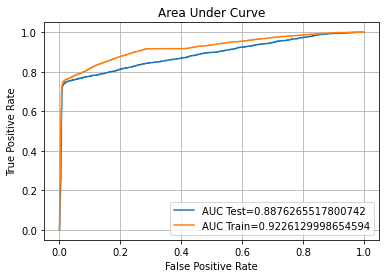

In [31]:
#calling function to plot the ROC_AUC learning curve
auc_plot(SVM1)

From the confusion matrix, the accuracy score is 86,24%, and we will try to improve the prediction using cross validation to optimise the parameters.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset.

# SVM tuning using StratifiedKFold and GridSearchCV
StratifiedKFold -> cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

GridSearchCV -> Exhaustive search over specified parameter values for an estimator

References: sklearn documentary

https://scikit-learn.org/stable/modules/grid_search.html

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [32]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
param_grid = [
    {
        'C': [0.5, 1, 10, 15, 100], 
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    },
]

#tuning the model using gridsearchCV and stratifiedkfold
optimal_param = GridSearchCV(
    SVC(), param_grid, cv=kfold, scoring='accuracy', verbose = 0)

In [33]:
#fitting the tuned model with training dataset
optimal_param.fit(xtrain, ytrain)

#print the best parameter
print(optimal_param.best_params_)

{'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}


In [34]:
#build the model with hyperparameter tuning
optimal_param = SVC(random_state = 42, probability=True, C=15, gamma='scale', kernel='rbf')
optimal_param.fit(xtrain,ytrain)

SVC(C=15, probability=True, random_state=42)

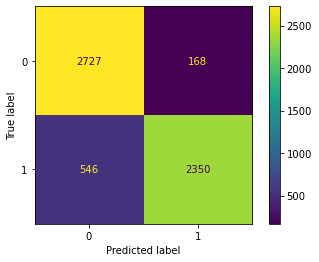

In [35]:
#plot confusion matrix for the tuned model
cm(optimal_param)

In [36]:
#print metrics score
scr(optimal_param, 'SVM_tuned')

Confusion Matrix Accuracy Score = 87.67%

Accuracy Score: Training -> 92.55% Testing -> 87.67%

Log Loss Training-> 2.574245680304944 Testing -> 4.258473610487741

Precision class 1: 93.33%
Precision class 0: 83.32%
Recall class 1: 81.15%
Recall class 0: 94.20%
F1: 86.81%
ROC AUC Training-> 97.58% Testing-> 93.46%


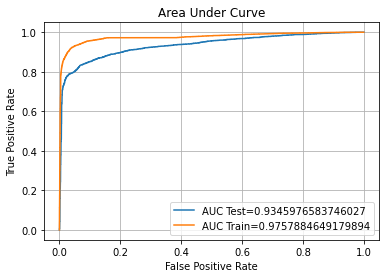

In [37]:
#plot the learning curve
auc_plot(optimal_param)

The accuracy score is 87.60%, it slightly improved from the model before cross validation. However, it results in overfitting for the model after hyperparameter tuning.

# Logistic Regression

In [39]:
#create logistic regression model
logreg = LogisticRegression()
#fitting the model with training dataset
logreg.fit(xtrain, ytrain)

LogisticRegression()

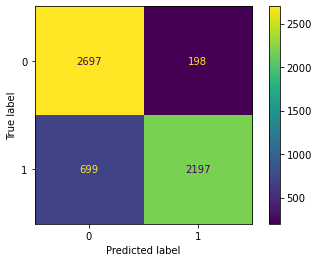

In [40]:
#confusion matrix
cm(logreg)

In [41]:
#print metrics score
scr(logreg, 'Logreg')

Confusion Matrix Accuracy Score = 84.51%

Accuracy Score: Training -> 85.01% Testing -> 84.51%

Log Loss Training-> 5.17662458901346 Testing -> 5.349929329394935

Precision class 1: 91.73%
Precision class 0: 79.42%
Recall class 1: 75.86%
Recall class 0: 93.16%
F1: 83.05%
ROC AUC Training-> 85.06% Testing-> 84.19%


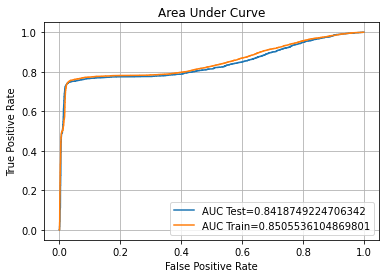

In [42]:
#plot learning curve
auc_plot(logreg)

The accuracy score is 84,56%, it's lower compared to SVM
We will tune the model using grid search cross validation

# Logistic Regression Tuning using GridSearchCV

In [43]:
log_param = [
    {
        'C': [0.01, 0.1, 1.0, 10.0, 100.0], 
        'penalty': ['l2'],
        'solver': ['newton-cg', 'sag'] 
    },
]

#tuned the model using gridsearch and kfold
opt_log = GridSearchCV(LogisticRegression(), param_grid = log_param, scoring='accuracy', cv=kfold, verbose = 0)

#fit the tuned model with training dataset
opt_log.fit(xtrain, ytrain) 
print(opt_log.best_params_) #best parameter tuning result

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [44]:
#build the model with hyperparameter tuning
opt_log = LogisticRegression(C=0.01, penalty='l2', solver='newton-cg')
opt_log.fit(xtrain, ytrain)

LogisticRegression(C=0.01, solver='newton-cg')

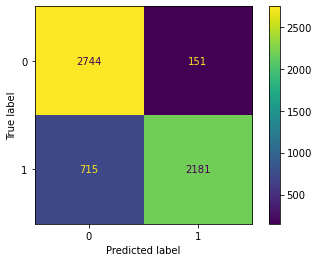

In [45]:
#plot confusion matrix
cm(opt_log)

In [46]:
#print metrics score
scr(opt_log, 'logreg_tuned')

Confusion Matrix Accuracy Score = 85.05%

Accuracy Score: Training -> 85.55% Testing -> 85.05%

Log Loss Training-> 4.990004484674195 Testing -> 5.165032135590504

Precision class 1: 93.52%
Precision class 0: 79.33%
Recall class 1: 75.31%
Recall class 0: 94.78%
F1: 83.44%
ROC AUC Training-> 84.65% Testing-> 83.83%


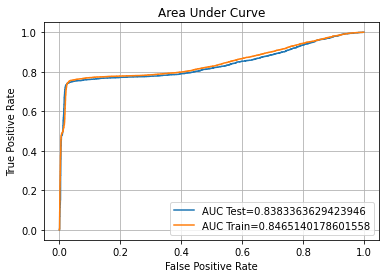

In [47]:
#plot learning curve
auc_plot(opt_log)

The testing accuracy is increased after parameter tuning to 85.10% and overfitting is reduced as well

# Random Forest

In [48]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
#fit the model with training dataset
RF.fit(xtrain, ytrain)

RandomForestClassifier()

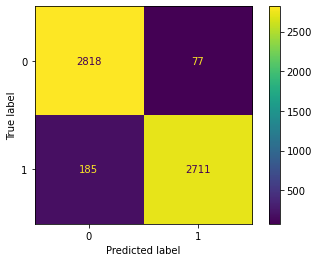

In [49]:
#calling function to plot confusion matrix
cm(RF)

In [50]:
#calling function to calculate model score
scr(RF, 'RF')

Confusion Matrix Accuracy Score = 95.48%

Accuracy Score: Training -> 100.00% Testing -> 95.48%

Log Loss Training-> 9.992007221626413e-16 Testing -> 1.56263529346723

Precision class 1: 97.24%
Precision class 0: 93.84%
Recall class 1: 93.61%
Recall class 0: 97.34%
F1: 95.39%
ROC AUC Training-> 100.00% Testing-> 99.21%


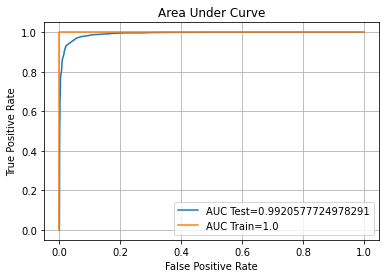

In [51]:
auc_plot(RF)

The accuracy score is 95.48%, it's higher compared to SVM and Logistic Regression. However, the model is overfitting as the training accuracy score is 100%

# Random Forest Tuning using RandomizedSearchCV and Kfold
Randomized search on hyper parameters.
In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

References: sklearn documentary

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [52]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#implement parameter tuning using randomized search cv and kfold
opt_RF = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = kfold, verbose=2, random_state=42, n_jobs = -1)
#fit the model with training dataset
opt_RF.fit(xtrain, ytrain) 
print(opt_RF.best_params_) #best parameter tuning result

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}


In [53]:
#build the model with hyperparameter tuning
opt_RF = RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf= 1,
                                max_features= 'auto', max_depth= 50, bootstrap= False)
opt_RF.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

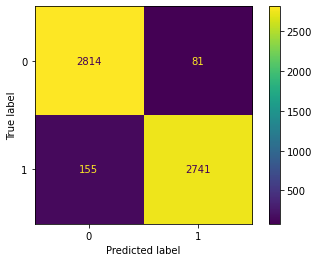

In [54]:
#calling function to plot confusion matrix
cm(opt_RF)

In [55]:
#calling function to show the metrics score
scr(opt_RF, 'RF_tuned')

Confusion Matrix Accuracy Score = 95.92%

Accuracy Score: Training -> 100.00% Testing -> 95.92%

Log Loss Training-> 9.992007221626413e-16 Testing -> 1.4075662228614698

Precision class 1: 97.13%
Precision class 0: 94.78%
Recall class 1: 94.65%
Recall class 0: 97.20%
F1: 95.87%
ROC AUC Training-> 100.00% Testing-> 99.36%


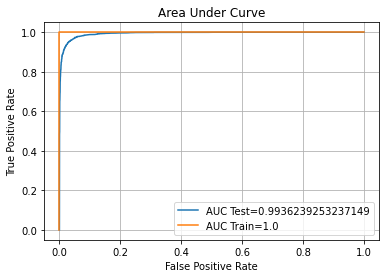

In [56]:
#plot learning curve
auc_plot(opt_RF)

The accuracy score after hyperparameter tuning is increased around 1%, however the overfitting still be a problem as the training accuracy still 100%

# Decision Tree

In [57]:
#import the library
from sklearn.tree import DecisionTreeClassifier
#create the model
decTree = DecisionTreeClassifier()
#fit the model with training data
decTree.fit(xtrain, ytrain)

DecisionTreeClassifier()

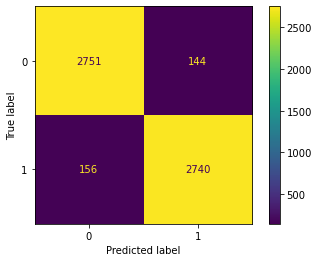

In [58]:
#confusion matrix
cm(decTree)

In [59]:
#calling metrics score function
scr(decTree, 'decTree')

Confusion Matrix Accuracy Score = 94.82%

Accuracy Score: Training -> 100.00% Testing -> 94.82%

Log Loss Training-> 9.992007221626413e-16 Testing -> 1.7892847626494832

Precision class 1: 95.01%
Precision class 0: 94.63%
Recall class 1: 94.61%
Recall class 0: 95.03%
F1: 94.81%
ROC AUC Training-> 100.00% Testing-> 94.82%


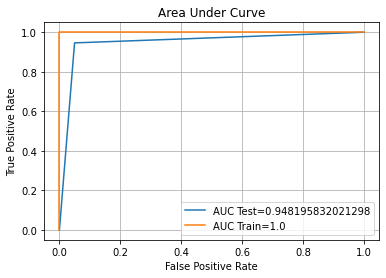

In [60]:
#plot learning curve
auc_plot(decTree)

The accuracy score is 95.04%, it's higher compared to SVM and Logistic Regression. However, it's still lower than Random Forest

# Tuning Decision Tree using RandomizedSearchCV

In [61]:
#parameter variables
criterion = ['gini', 'entropy']
max_depth = [3,6,9]
min_samples_split = [3,6,9]
min_samples_leaf = [2,4,8]

#put the variables to dict
random_tree = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#implement hyperparameter tuning to the model
opt_decTree = RandomizedSearchCV(estimator = decTree, param_distributions = random_tree, cv = kfold, verbose=1, n_jobs = -1)
#fit the model with training dataset
opt_decTree.fit(xtrain, ytrain) 
print(opt_decTree.best_params_) #best parameter

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'entropy'}


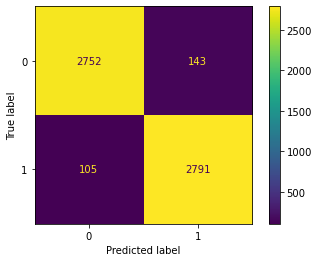

In [62]:
#function to plot confusion matrix
cm(opt_decTree)

In [63]:
#function to print metrics score
scr(opt_decTree, 'decTree_tuned')

Confusion Matrix Accuracy Score = 95.72%

Accuracy Score: Training -> 97.03% Testing -> 95.72%

Log Loss Training-> 1.0251110665703456 Testing -> 1.4791453787550288

Precision class 1: 95.13%
Precision class 0: 96.32%
Recall class 1: 96.37%
Recall class 0: 95.06%
F1: 95.75%
ROC AUC Training-> 99.68% Testing-> 98.51%


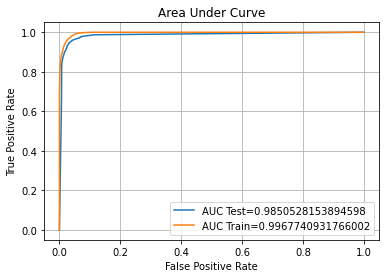

In [64]:
#plot learning curve
auc_plot(opt_decTree)

The accuracy score after hyperparameter tuning is increased around 1%, and the overfitting is reduced. So far, decision tree is the best model for this case.

# KNN

In [65]:
#import library for KNN
from sklearn.neighbors import KNeighborsClassifier

#build the model
neigh = KNeighborsClassifier(n_neighbors=3)
#fit the model with training dataset
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

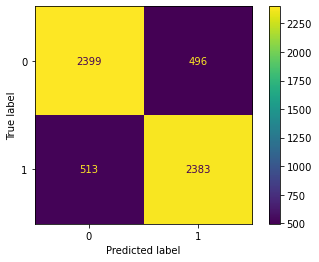

In [66]:
#funtion for confusion matrix plot
cm(neigh)

In [67]:
#function for metrics calculation
scr(neigh, 'KNN')

Confusion Matrix Accuracy Score = 82.58%

Accuracy Score: Training -> 92.23% Testing -> 82.58%

Log Loss Training-> 2.684192717558301 Testing -> 6.017962697770724

Precision class 1: 82.77%
Precision class 0: 82.38%
Recall class 1: 82.29%
Recall class 0: 82.87%
F1: 82.53%
ROC AUC Training-> 97.65% Testing-> 88.82%


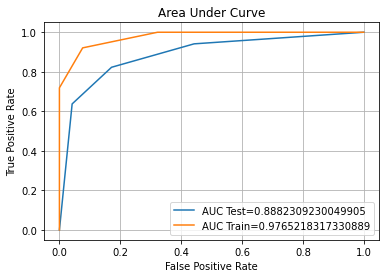

In [68]:
#plot learning curve
auc_plot(neigh)

The accuracy score is 83.15%, it's the lowest accuracy compared to the other algorithms. Also, this model has overfitting problem.

# Tuning KNN using GridSearchCV and KFold

Text(0, 0.5, 'testing')

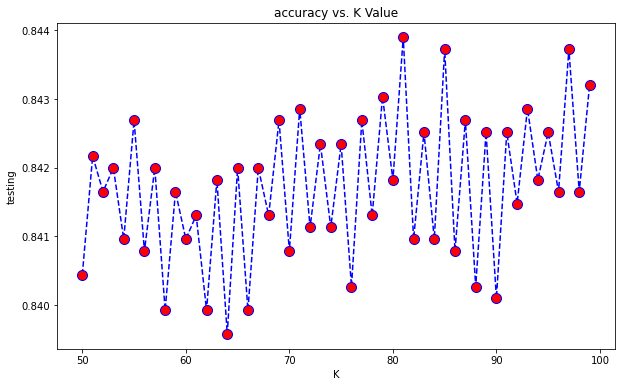

In [69]:
#finding the optimum k number
acc=[]
for i in range(50,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(xtrain,ytrain)
    yhat = neigh.predict(xtest)
    acc.append(accuracy_score(ytest, yhat))

#plot to visualise the best k    
plt.figure(figsize=(10,6))
plt.plot(range(50,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('testing')

In [70]:
#parameter dict
tuning_params = {
    'n_neighbors' : [64,71,75,94], #from the plot above
    "leaf_size":[5,10,20,30],
    "p":[1,2]
}

#implement hyperparameter tuning to the model
opt_knn = GridSearchCV(neigh, param_grid = tuning_params, cv = kfold, verbose = 1, n_jobs = -1)
#fit the model with training dataset
opt_knn.fit(xtrain, ytrain) 
print(opt_knn.best_params_) #best parameter

Fitting 10 folds for each of 32 candidates, totalling 320 fits
{'leaf_size': 5, 'n_neighbors': 75, 'p': 1}


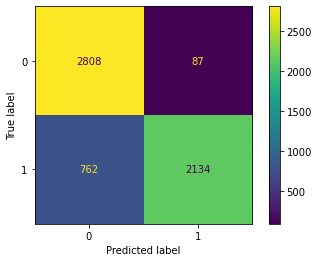

In [71]:
#function for confusion matrix plot
cm(opt_knn)

In [72]:
#function for metrics calculation
scr(opt_knn, 'knn_tuned')

Confusion Matrix Accuracy Score = 85.34%

Accuracy Score: Training -> 85.74% Testing -> 85.34%

Log Loss Training-> 4.9235322371165315 Testing -> 5.063631622216474

Precision class 1: 96.08%
Precision class 0: 78.66%
Recall class 1: 73.69%
Recall class 0: 96.99%
F1: 83.41%
ROC AUC Training-> 91.47% Testing-> 90.41%


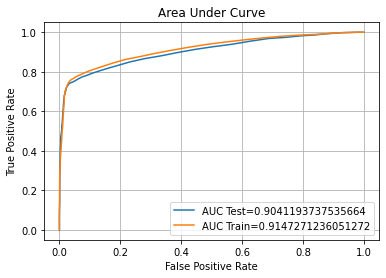

In [73]:
#plot learning curve
auc_plot(opt_knn)

The accuracy score after hyperparameter tuning is increased around 2% and the overfitting is reduced respectively.

# Function to calculate metrics score for DL

In [74]:
import tensorflow.experimental.numpy as tnp
#pass algo, name, testeval score, traineval score, confusion matrix
def calc(algo, name, testeval, traineval, cmt): 
    #tn, fp, fn, tp =tf.experimental.numpy.ravel(cmt)
    tn, fp, fn, tp = tnp.ravel(cmt)
    tn = tn.numpy()
    fp = fp.numpy()
    fn = fn.numpy()
    tp = tp.numpy()
    cmatrix = ((tn + tp)/ytest.count())*100  
    acctest = (testeval[1])*100
    acctrain = (traineval[1])*100

    #log loss
    logtest = testeval[0]
    logtrain = traineval[0]
            
     #classification report
    precision1 = (tp / (tp+fp))*100
    precision0 = (tn/(tn+fn))*100
    recall1 = (tp/(tp+fn))*100
    recall0 = (tn/(tn+fp))*100
    f1 = 2*(precision1 * recall1)/(precision1 + recall1)

    #roc auc score
    roctest = (testeval[2])*100
    roctrain = (traineval[2])*100
    #insert the metrics score to list
    insertlist(name, cmatrix, acctest, acctrain, logtest, logtrain, precision1,
               precision0, recall1, recall0, f1, roctest, roctrain)      
    #print metrics score
    return prints(cmatrix, acctest, acctrain, logtest, logtrain, precision1,
                  precision0, recall1, recall0, f1, roctest, roctrain)

# Deep Learning ANN 

In [75]:
#import library for deep learning
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten,Dense,Dropout,BatchNormalization, Conv1D,MaxPool1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [76]:
#build the model
ann=keras.Sequential([keras.layers.Dense(20,input_shape=(15,),activation='relu'),
                       keras.layers.Dense(1,activation='sigmoid'),])
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC()])
#train the model
ann.fit(xtrain,ytrain, epochs=30)

Epoch 1/30
423/423 [==============================] - 1s 891us/step - loss: 0.5351 - accuracy: 0.7880 - auc: 0.8390
Epoch 2/30
423/423 [==============================] - 0s 893us/step - loss: 0.4207 - accuracy: 0.8479 - auc: 0.8522
Epoch 3/30
423/423 [==============================] - 0s 870us/step - loss: 0.4067 - accuracy: 0.8503 - auc: 0.8546
Epoch 4/30
423/423 [==============================] - 0s 879us/step - loss: 0.4016 - accuracy: 0.8521 - auc: 0.8563
Epoch 5/30
423/423 [==============================] - 0s 891us/step - loss: 0.3967 - accuracy: 0.8534 - auc: 0.8579
Epoch 6/30
423/423 [==============================] - 0s 898us/step - loss: 0.3894 - accuracy: 0.8555 - auc: 0.8622
Epoch 7/30
423/423 [==============================] - 0s 898us/step - loss: 0.3807 - accuracy: 0.8561 - auc: 0.8695
Epoch 8/30
423/423 [==============================] - 0s 898us/step - loss: 0.3717 - accuracy: 0.8579 - auc: 0.8765
Epoch 9/30
423/423 [==============================] - 0s 891us/step - lo

In [77]:
#evaluate testing
testeval1 = ann.evaluate(xtest, ytest)

181/181 [==============================] - 0s 809us/step - loss: 0.3157 - accuracy: 0.8505 - auc: 0.9350


In [78]:
#evaluate training
traineval1 = ann.evaluate(xtrain, ytrain)

423/423 [==============================] - 0s 852us/step - loss: 0.3068 - accuracy: 0.8566 - auc: 0.9367


In [79]:
ytest[:10]

10529    1
15361    1
12160    1
2953     0
15870    1
11474    1
1730     0
12313    1
14851    1
15363    1
Name: is_fraud, dtype: int64

In [80]:
#make prediction
yprediction=ann.predict(xtest)
yprediction[:5]

array([[0.99761486],
       [0.99609905],
       [0.9578708 ],
       [0.10071811],
       [0.43935394]], dtype=float32)

As we use the sigmoid function for output layer the prediction will be between 0 and 1.Let's change it to 0 for less than 0.5 and 1 for greater than 0.5

In [81]:
ypred=[]
for element in yprediction:
    if element>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

ypred[:10]
         

[1, 1, 1, 0, 0, 0, 0, 1, 0, 1]

Text(69.0, 0.5, 'actual')

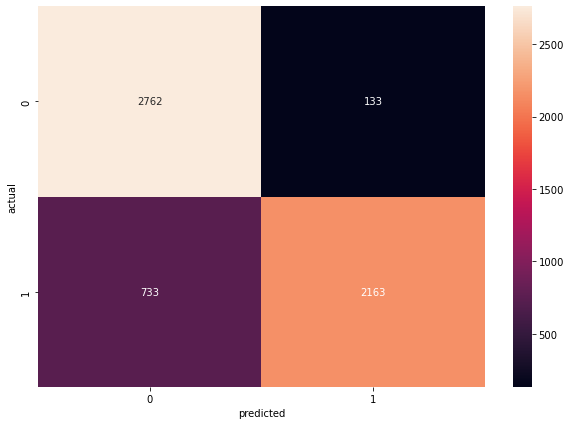

In [82]:
#plot confusion matrix
cmt =tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cmt,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [83]:
#print the metrics score
#pass algo, name, testeval score, traineval score, confusion matrix
calc(ann, 'ann', testeval1, traineval1, cmt) 

Confusion Matrix Accuracy Score = 85.05%

Accuracy Score: Training -> 85.66% Testing -> 85.05%

Log Loss Training-> 0.30682724714279175 Testing -> 0.3157438635826111

Precision class 1: 94.21%
Precision class 0: 79.03%
Recall class 1: 74.69%
Recall class 0: 95.41%
F1: 83.32%
ROC AUC Training-> 93.67% Testing-> 93.50%


In [84]:
history=ann.fit(xtrain,ytrain,epochs=30,validation_data=(xtest,ytest),verbose=1)

Epoch 1/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3075 - accuracy: 0.8565 - auc: 0.9355 - val_loss: 0.3149 - val_accuracy: 0.8501 - val_auc: 0.9358
Epoch 2/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3067 - accuracy: 0.8555 - auc: 0.9363 - val_loss: 0.3139 - val_accuracy: 0.8491 - val_auc: 0.9356
Epoch 3/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3065 - accuracy: 0.8572 - auc: 0.9361 - val_loss: 0.3122 - val_accuracy: 0.8503 - val_auc: 0.9354
Epoch 4/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.8566 - auc: 0.9364 - val_loss: 0.3135 - val_accuracy: 0.8506 - val_auc: 0.9365
Epoch 5/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3048 - accuracy: 0.8574 - auc: 0.9366 - val_loss: 0.3148 - val_accuracy: 0.8518 - val_auc: 0.9361
Epoch 6/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3045 - accuracy: 0.8584 - auc: 0.9370 - val_loss: 0.31

In [86]:
def plot_learningCurve(history,epoch):
  #plotting training and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  #plotting training and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()


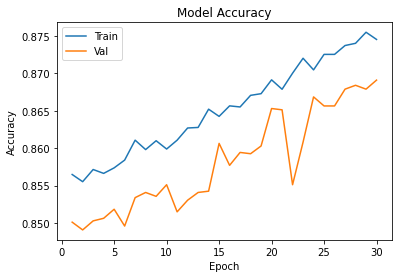

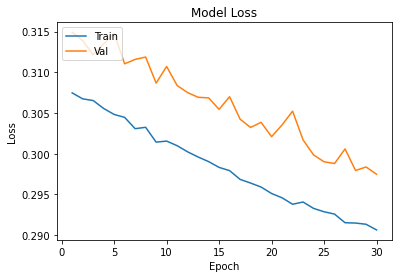

In [87]:
plot_learningCurve(history,30)

# Hyperparameter tuning ANN

In [88]:
def create_my_model(optimizer):
    mymodel=Sequential()
    mymodel.add(Dense(12,input_dim=15,activation='relu'))
    mymodel.add(Dense(1,activation='sigmoid'))
    mymodel.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy',
                                                                            tf.keras.metrics.AUC()])
    return mymodel

In [89]:
model=KerasClassifier(build_fn= create_my_model,epochs=50,batch_size=15)

C:\Users\dvnbi\AppData\Local\Temp/ipykernel_24632/1601473167.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn= create_my_model,epochs=50,batch_size=15)


In [90]:
optimizer = ['SGD','Adadelta','RMSprop','Adagrad','Adam']
parameter_grid=dict(optimizer=optimizer)
grid= GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=kfold)
grid_result=grid.fit(xtrain,ytrain)

Epoch 1/50
901/901 [==============================] - 2s 1ms/step - loss: 0.5672 - accuracy: 0.7502 - auc_1: 0.8126
Epoch 2/50
901/901 [==============================] - 1s 1ms/step - loss: 0.4251 - accuracy: 0.8493 - auc_1: 0.8505
Epoch 3/50
901/901 [==============================] - 1s 1ms/step - loss: 0.4086 - accuracy: 0.8502 - auc_1: 0.8509
Epoch 4/50
901/901 [==============================] - 1s 1ms/step - loss: 0.4018 - accuracy: 0.8526 - auc_1: 0.8569
Epoch 5/50
901/901 [==============================] - 1s 961us/step - loss: 0.3952 - accuracy: 0.8546 - auc_1: 0.8594
Epoch 6/50
901/901 [==============================] - 1s 992us/step - loss: 0.3857 - accuracy: 0.8566 - auc_1: 0.8633
Epoch 7/50
901/901 [==============================] - 1s 1ms/step - loss: 0.3766 - accuracy: 0.8587 - auc_1: 0.8696
Epoch 8/50
901/901 [==============================] - 1s 990us/step - loss: 0.3699 - accuracy: 0.8576 - auc_1: 0.8755
Epoch 9/50
901/901 [==============================] - 1s 1ms/step 

In [91]:
print("Best:%f using %s" % (grid_result.best_score_,grid_result.best_params_))

Best:0.879135 using {'optimizer': 'Adam'}


In [92]:
#tuning epoch and batch size
def create_my_model1():
    mymodel=Sequential()
    mymodel.add(Dense(12,input_dim=15,activation='relu'))
    mymodel.add(Dense(1,activation='sigmoid'))
    mymodel.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy',
                    tf.keras.metrics.AUC()])
    return mymodel

In [93]:
model=KerasClassifier(build_fn= create_my_model1)
#defining the parameters
batchsize=[10,15,20,40,60,80,100]
epochs=[10,15,30,50]
parameter_grid=dict(batch_size=batchsize,epochs=epochs)
mygrid= GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=kfold)
grid_result1=mygrid.fit(xtrain,ytrain)

C:\Users\dvnbi\AppData\Local\Temp/ipykernel_24632/401381974.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn= create_my_model1)


Epoch 1/50
901/901 [==============================] - 1s 944us/step - loss: 0.5034 - accuracy: 0.7821 - auc_2: 0.8414
Epoch 2/50
901/901 [==============================] - 1s 907us/step - loss: 0.4057 - accuracy: 0.8521 - auc_2: 0.8581
Epoch 3/50
901/901 [==============================] - 1s 911us/step - loss: 0.3931 - accuracy: 0.8552 - auc_2: 0.8643
Epoch 4/50
901/901 [==============================] - 1s 907us/step - loss: 0.3837 - accuracy: 0.8564 - auc_2: 0.8701
Epoch 5/50
901/901 [==============================] - 1s 929us/step - loss: 0.3763 - accuracy: 0.8569 - auc_2: 0.8747
Epoch 6/50
901/901 [==============================] - 1s 940us/step - loss: 0.3691 - accuracy: 0.8577 - auc_2: 0.8800
Epoch 7/50
901/901 [==============================] - 1s 905us/step - loss: 0.3631 - accuracy: 0.8579 - auc_2: 0.8851
Epoch 8/50
901/901 [==============================] - 1s 919us/step - loss: 0.3565 - accuracy: 0.8572 - auc_2: 0.8933
Epoch 9/50
901/901 [==============================] - 1s

In [94]:
print("Best:%f using %s" % (grid_result1.best_score_,grid_result1.best_params_))

Best:0.883948 using {'batch_size': 15, 'epochs': 50}


In [95]:
opt_ann=create_my_model1()
#, epochs=50,batch_size=10)
opt_ann.fit(xtrain,ytrain, epochs = 50, batch_size = 10)

Epoch 1/50
1352/1352 [==============================] - 2s 898us/step - loss: 0.4967 - accuracy: 0.8113 - auc_3: 0.8411
Epoch 2/50
1352/1352 [==============================] - 1s 913us/step - loss: 0.4147 - accuracy: 0.8465 - auc_3: 0.8515
Epoch 3/50
1352/1352 [==============================] - 1s 986us/step - loss: 0.4115 - accuracy: 0.8486 - auc_3: 0.8522
Epoch 4/50
1352/1352 [==============================] - 1s 913us/step - loss: 0.4105 - accuracy: 0.8478 - auc_3: 0.8534
Epoch 5/50
1352/1352 [==============================] - 1s 935us/step - loss: 0.4094 - accuracy: 0.8486 - auc_3: 0.8522
Epoch 6/50
1352/1352 [==============================] - 1s 918us/step - loss: 0.4099 - accuracy: 0.8486 - auc_3: 0.8528
Epoch 7/50
1352/1352 [==============================] - 1s 909us/step - loss: 0.4088 - accuracy: 0.8483 - auc_3: 0.8528
Epoch 8/50
1352/1352 [==============================] - 1s 919us/step - loss: 0.4085 - accuracy: 0.8488 - auc_3: 0.8531
Epoch 9/50
1352/1352 [==================

In [96]:
#evaluate testing
testeval = opt_ann.evaluate(xtest, ytest)
#evaluate training
traineval = opt_ann.evaluate(xtrain, ytrain)

423/423 [==============================] - 0s 811us/step - loss: 0.3798 - accuracy: 0.8433 - auc_3: 0.8873


In [97]:
yprediction1=opt_ann.predict(xtest)
ypred1=[]
for element in yprediction1:
    if element>0.5:
        ypred1.append(1)
    else:
        ypred1.append(0)

Text(69.0, 0.5, 'actual')

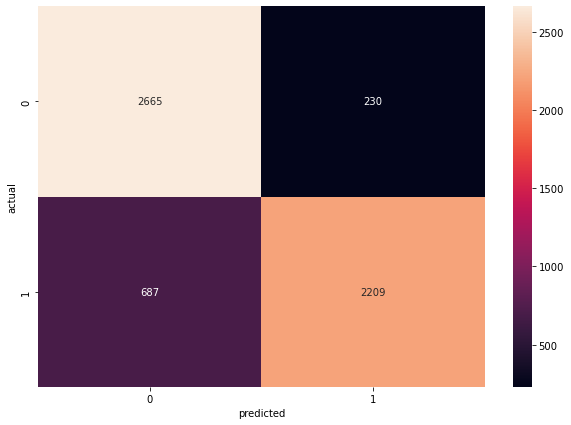

In [98]:
#plot confusion matrix
cm1 =tf.math.confusion_matrix(labels=ytest,predictions=ypred1)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [99]:
calc(opt_ann, 'ann_tuned', testeval, traineval, cm1)

Confusion Matrix Accuracy Score = 84.17%

Accuracy Score: Training -> 84.33% Testing -> 84.17%

Log Loss Training-> 0.37976452708244324 Testing -> 0.38683804869651794

Precision class 1: 90.57%
Precision class 0: 79.50%
Recall class 1: 76.28%
Recall class 0: 92.06%
F1: 82.81%
ROC AUC Training-> 88.73% Testing-> 87.95%


In [100]:
history=opt_ann.fit(xtrain,ytrain,epochs=30,validation_data=(xtest,ytest),verbose=1)

Epoch 1/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3794 - accuracy: 0.8399 - auc_3: 0.8876 - val_loss: 0.3891 - val_accuracy: 0.8232 - val_auc_3: 0.8795
Epoch 2/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3795 - accuracy: 0.8402 - auc_3: 0.8876 - val_loss: 0.3866 - val_accuracy: 0.8323 - val_auc_3: 0.8801
Epoch 3/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3795 - accuracy: 0.8399 - auc_3: 0.8877 - val_loss: 0.3863 - val_accuracy: 0.8410 - val_auc_3: 0.8800
Epoch 4/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3795 - accuracy: 0.8409 - auc_3: 0.8878 - val_loss: 0.3861 - val_accuracy: 0.8441 - val_auc_3: 0.8805
Epoch 5/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3797 - accuracy: 0.8401 - auc_3: 0.8872 - val_loss: 0.3861 - val_accuracy: 0.8394 - val_auc_3: 0.8803
Epoch 6/30
423/423 [==============================] - 1s 1ms/step - loss: 0.3797 - accuracy: 0.8403 - auc_3: 0

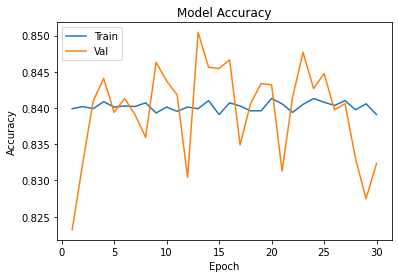

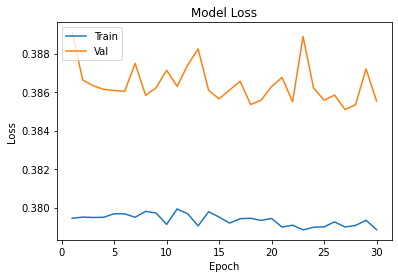

In [101]:
plot_learningCurve(history,30)

# CNN

In [102]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [103]:
xtrain.shape, xtest.shape

((13511, 15, 1), (5791, 15, 1))

In [104]:
#build CNN
epochs=20
cnn=Sequential()
cnn.add(Conv1D(32,2, activation='relu',input_shape=xtrain[0].shape))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Conv1D(64,2, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(1,activation='sigmoid'))

In [105]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 14, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 13, 64)           

In [106]:
cnn.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy',
                                                                            tf.keras.metrics.AUC()])

In [107]:
history=cnn.fit(xtrain,ytrain,epochs=epochs,validation_data=(xtest,ytest),verbose=1)

Epoch 1/20
423/423 [==============================] - 3s 4ms/step - loss: 0.7496 - accuracy: 0.6874 - auc_4: 0.7472 - val_loss: 0.4684 - val_accuracy: 0.8453 - val_auc_4: 0.8625
Epoch 2/20
423/423 [==============================] - 2s 4ms/step - loss: 0.5613 - accuracy: 0.7738 - auc_4: 0.8358 - val_loss: 0.3790 - val_accuracy: 0.8584 - val_auc_4: 0.8730
Epoch 3/20
423/423 [==============================] - 2s 4ms/step - loss: 0.5082 - accuracy: 0.7901 - auc_4: 0.8478 - val_loss: 0.3691 - val_accuracy: 0.8591 - val_auc_4: 0.8796
Epoch 4/20
423/423 [==============================] - 2s 4ms/step - loss: 0.4605 - accuracy: 0.8106 - auc_4: 0.8631 - val_loss: 0.3685 - val_accuracy: 0.8591 - val_auc_4: 0.8869
Epoch 5/20
423/423 [==============================] - 2s 4ms/step - loss: 0.4419 - accuracy: 0.8196 - auc_4: 0.8658 - val_loss: 0.3698 - val_accuracy: 0.8591 - val_auc_4: 0.8928
Epoch 6/20
423/423 [==============================] - 2s 4ms/step - loss: 0.4149 - accuracy: 0.8288 - auc_4: 0

In [108]:
cntesteval = cnn.evaluate(xtest, ytest)
cntraineval = cnn.evaluate(xtrain,ytrain)

423/423 [==============================] - 1s 1ms/step - loss: 0.2862 - accuracy: 0.8832 - auc_4: 0.9502


In [109]:
cnypredict=cnn.predict(xtest)
ypred2=[]
for element in cnypredict:
    if element>0.5:
        ypred2.append(1)
    else:
        ypred2.append(0)

Text(69.0, 0.5, 'actual')

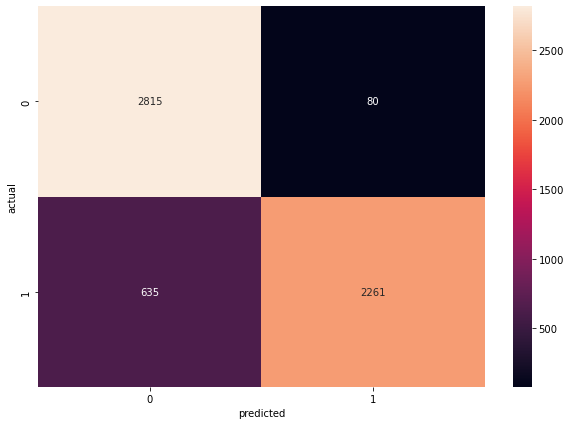

In [110]:
#plot confusion matrix
cm2 =tf.math.confusion_matrix(labels=ytest,predictions=ypred2)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [111]:
calc(cnn, 'cnn', cntesteval, cntraineval, cm2)

Confusion Matrix Accuracy Score = 87.65%

Accuracy Score: Training -> 88.32% Testing -> 87.65%

Log Loss Training-> 0.2861575186252594 Testing -> 0.299532413482666

Precision class 1: 96.58%
Precision class 0: 81.59%
Recall class 1: 78.07%
Recall class 0: 97.24%
F1: 86.35%
ROC AUC Training-> 95.02% Testing-> 94.57%


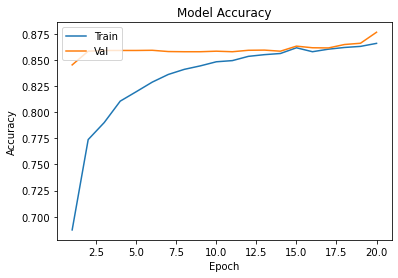

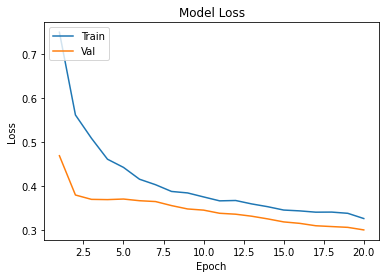

In [112]:
plot_learningCurve(history,epochs)

In [113]:
#Adding MaxPool
epochs=50
cnnmax=Sequential()
cnnmax.add(Conv1D(32,2, activation='relu',input_shape=xtrain[0].shape))
cnnmax.add(BatchNormalization())
cnnmax.add(MaxPool1D(2))
cnnmax.add(Dropout(0.2))

cnnmax.add(Conv1D(64,2, activation='relu'))
cnnmax.add(BatchNormalization())
cnnmax.add(MaxPool1D(2))
cnnmax.add(Dropout(0.5))

cnnmax.add(Flatten())
cnnmax.add(Dense(64,activation='relu'))
cnnmax.add(Dropout(0.5))

cnnmax.add(Dense(1,activation='sigmoid'))

In [114]:
cnnmax.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy',
                                                                             tf.keras.metrics.AUC()])

In [115]:
history2=cnnmax.fit(xtrain,ytrain,epochs=epochs,validation_data=(xtest,ytest),verbose=1)

Epoch 1/50
423/423 [==============================] - 2s 4ms/step - loss: 0.9427 - accuracy: 0.5741 - auc_5: 0.6057 - val_loss: 0.5789 - val_accuracy: 0.7417 - val_auc_5: 0.7967
Epoch 2/50
423/423 [==============================] - 1s 3ms/step - loss: 0.7270 - accuracy: 0.6498 - auc_5: 0.7096 - val_loss: 0.4842 - val_accuracy: 0.7885 - val_auc_5: 0.8390
Epoch 3/50
423/423 [==============================] - 1s 3ms/step - loss: 0.6598 - accuracy: 0.6805 - auc_5: 0.7425 - val_loss: 0.4646 - val_accuracy: 0.8083 - val_auc_5: 0.8480
Epoch 4/50
423/423 [==============================] - 1s 3ms/step - loss: 0.6047 - accuracy: 0.7073 - auc_5: 0.7696 - val_loss: 0.4552 - val_accuracy: 0.8204 - val_auc_5: 0.8536
Epoch 5/50
423/423 [==============================] - 1s 3ms/step - loss: 0.5649 - accuracy: 0.7250 - auc_5: 0.7885 - val_loss: 0.4486 - val_accuracy: 0.8247 - val_auc_5: 0.8579
Epoch 6/50
423/423 [==============================] - 1s 3ms/step - loss: 0.5498 - accuracy: 0.7358 - auc_5: 0

In [116]:
maxtesteval = cnnmax.evaluate(xtest, ytest)
maxtraineval = cnnmax.evaluate(xtrain,ytrain)

423/423 [==============================] - 1s 1ms/step - loss: 0.3385 - accuracy: 0.8626 - auc_5: 0.9236


In [117]:
cmpredict=cnnmax.predict(xtest)
ypred3=[]
for element in cmpredict:
    if element>0.5:
        ypred3.append(1)
    else:
        ypred3.append(0)

Text(69.0, 0.5, 'actual')

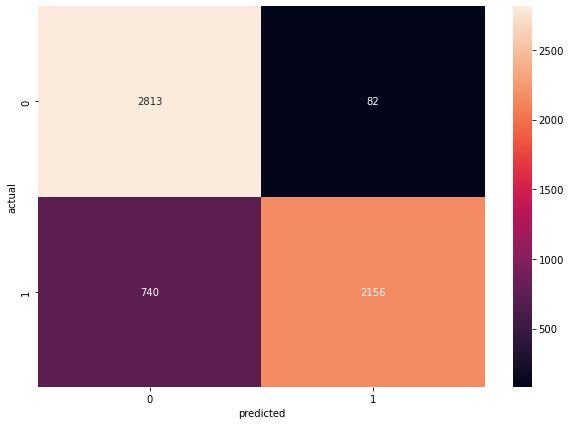

In [118]:
#plot confusion matrix
cm3 =tf.math.confusion_matrix(labels=ytest,predictions=ypred3)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [119]:
calc(cnn, 'cnn_tuned', maxtesteval, maxtraineval, cm3)

Confusion Matrix Accuracy Score = 85.81%

Accuracy Score: Training -> 86.26% Testing -> 85.81%

Log Loss Training-> 0.3385413885116577 Testing -> 0.3472605347633362

Precision class 1: 96.34%
Precision class 0: 79.17%
Recall class 1: 74.45%
Recall class 0: 97.17%
F1: 83.99%
ROC AUC Training-> 92.36% Testing-> 91.56%


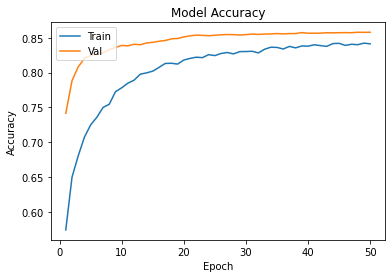

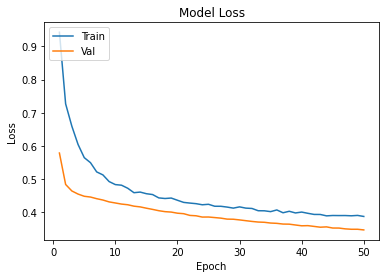

In [120]:
plot_learningCurve(history2,epochs)

# Scoring Comparison

In [121]:
#transofrm the score list to dataframe for line chart
scoring = pd.DataFrame(score, columns = ['algo','c_matrix','acc_test','acc_train', 'loss_test',
                                         'loss_train', 'prec1', 'prec0', 'recall1','recall0',
                                         'F1', 'roctest', 'roctrain'])
scoring

,algo,c_matrix,acc_test,acc_train,loss_test,loss_train,prec1,prec0,recall1,recall0,F1,roctest,roctrain
0,SVM1,86.271801,86.271801,86.973577,4.741560,4.499174e+00,97.298514,79.411765,74.620166,97.927461,84.463553,88.762655,92.261300
1,SVM_tuned,87.670523,87.670523,92.546814,4.258474,2.574246e+00,93.328038,83.318057,81.146409,94.196891,86.811969,93.459766,97.578846
2,Logreg,84.510447,84.510447,85.012212,5.349929,5.176625e+00,91.732777,79.416961,75.863260,93.160622,83.046683,84.187492,85.055361
3,logreg_tuned,85.045761,85.045761,85.552513,5.165032,4.990004e+00,93.524871,79.329286,75.310773,94.784111,83.435348,83.833636,84.651402
4,RF,95.475738,95.475738,100.000000,1.562635,9.992007e-16,97.238164,93.839494,93.611878,97.340242,95.390570,99.205777,100.000000
5,RF_tuned,95.924711,95.924711,100.000000,1.407566,9.992007e-16,97.129695,94.779387,94.647790,97.202073,95.872683,99.362393,100.000000
6,decTree,94.819548,94.819548,100.000000,1.789285,9.992007e-16,95.006935,94.633643,94.613260,95.025907,94.809689,94.819583,100.000000
7,decTree_tuned,95.717493,95.717493,97.032048,1.479145,1.025111e+00,95.126108,96.324816,96.374309,95.060449,95.746141,98.505282,99.677409
8,KNN,82.576412,82.576412,92.228555,6.017963,2.684193e+00,82.771796,82.383242,82.285912,82.867012,82.528139,88.823092,97.652183
9,knn_tuned,85.339320,85.339320,85.744949,5.063632,4.923532e+00,96.082846,78.655462,73.687845,96.994819,83.408247,90.411937,91.472712


# Accuracy Score Training VS Testing

<Figure size 2160x3600 with 0 Axes>

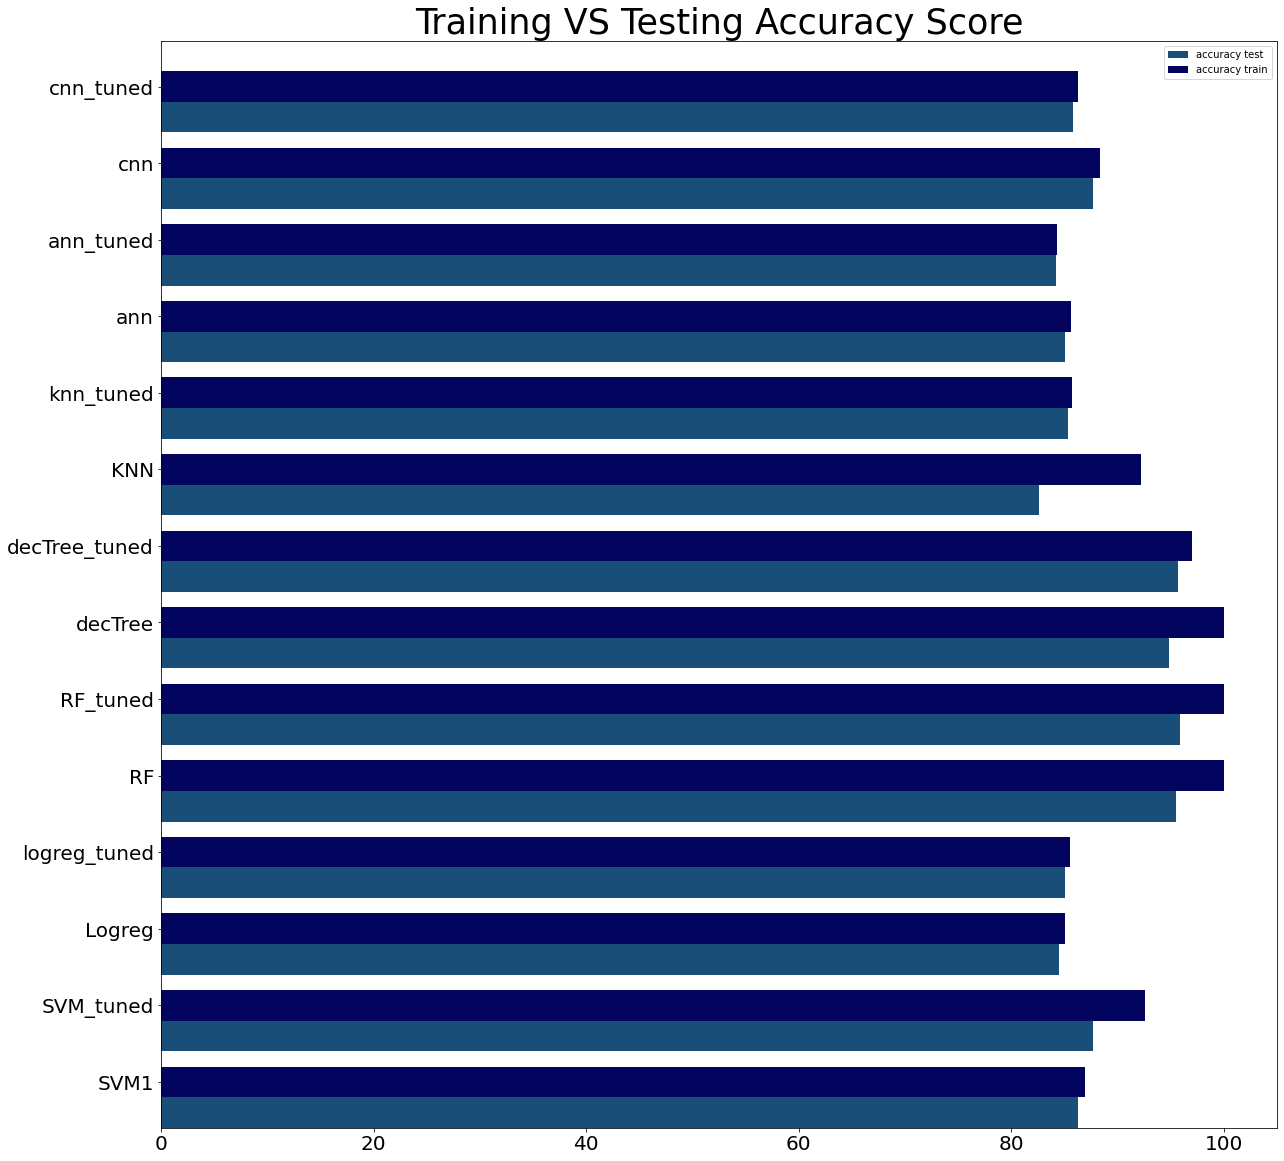

In [122]:
#horizontal bar for accuracy score comparison
plt.figure(figsize=(30,50))

ind = np.arange(len(scoring['algo']))
width = 0.4

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(ind, scoring['acc_test'], width, color='#184e77', label='accuracy test')
ax.barh(ind + width, scoring['acc_train'], width, color='#03045e', label='accuracy train')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.legend()
plt.title('Training VS Testing Accuracy Score', fontsize=35)
plt.show()

# Loss Training VS Testing

<Figure size 2160x3600 with 0 Axes>

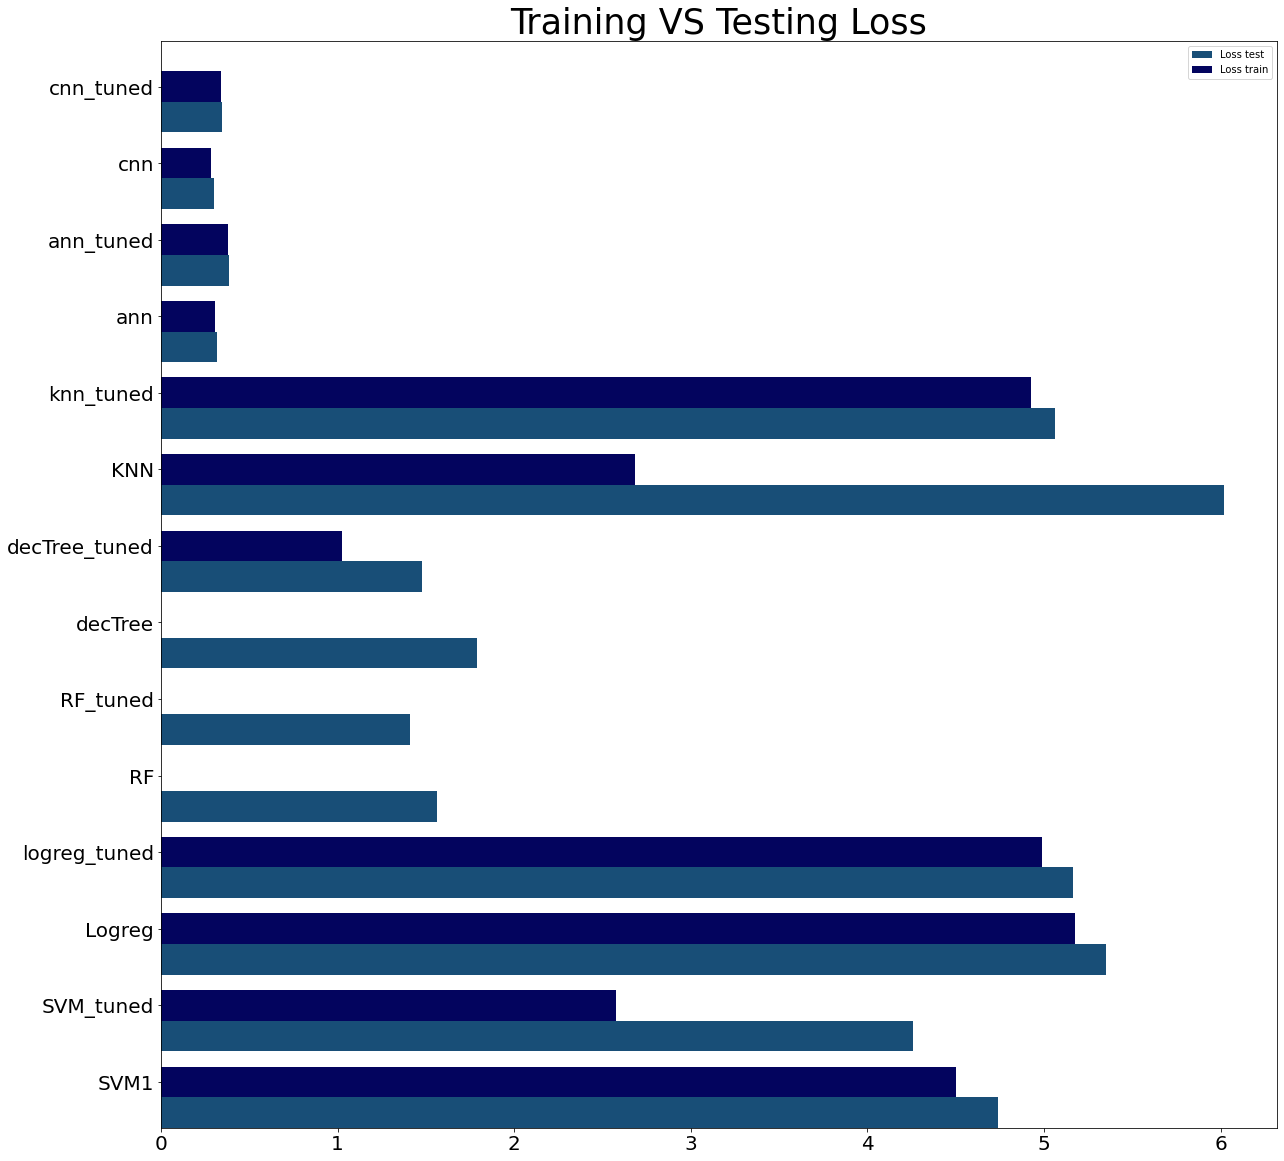

In [123]:
#horizontal bar for loss comparison
plt.figure(figsize=(30,50))

ind = np.arange(len(scoring['algo']))
width = 0.4

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(ind, scoring['loss_test'], width, color='#184e77', label='Loss test')
ax.barh(ind + width, scoring['loss_train'], width, color='#03045e', label='Loss train')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.legend()
plt.title('Training VS Testing Loss', fontsize=35)
plt.show()

# Precision

<Figure size 2160x3600 with 0 Axes>

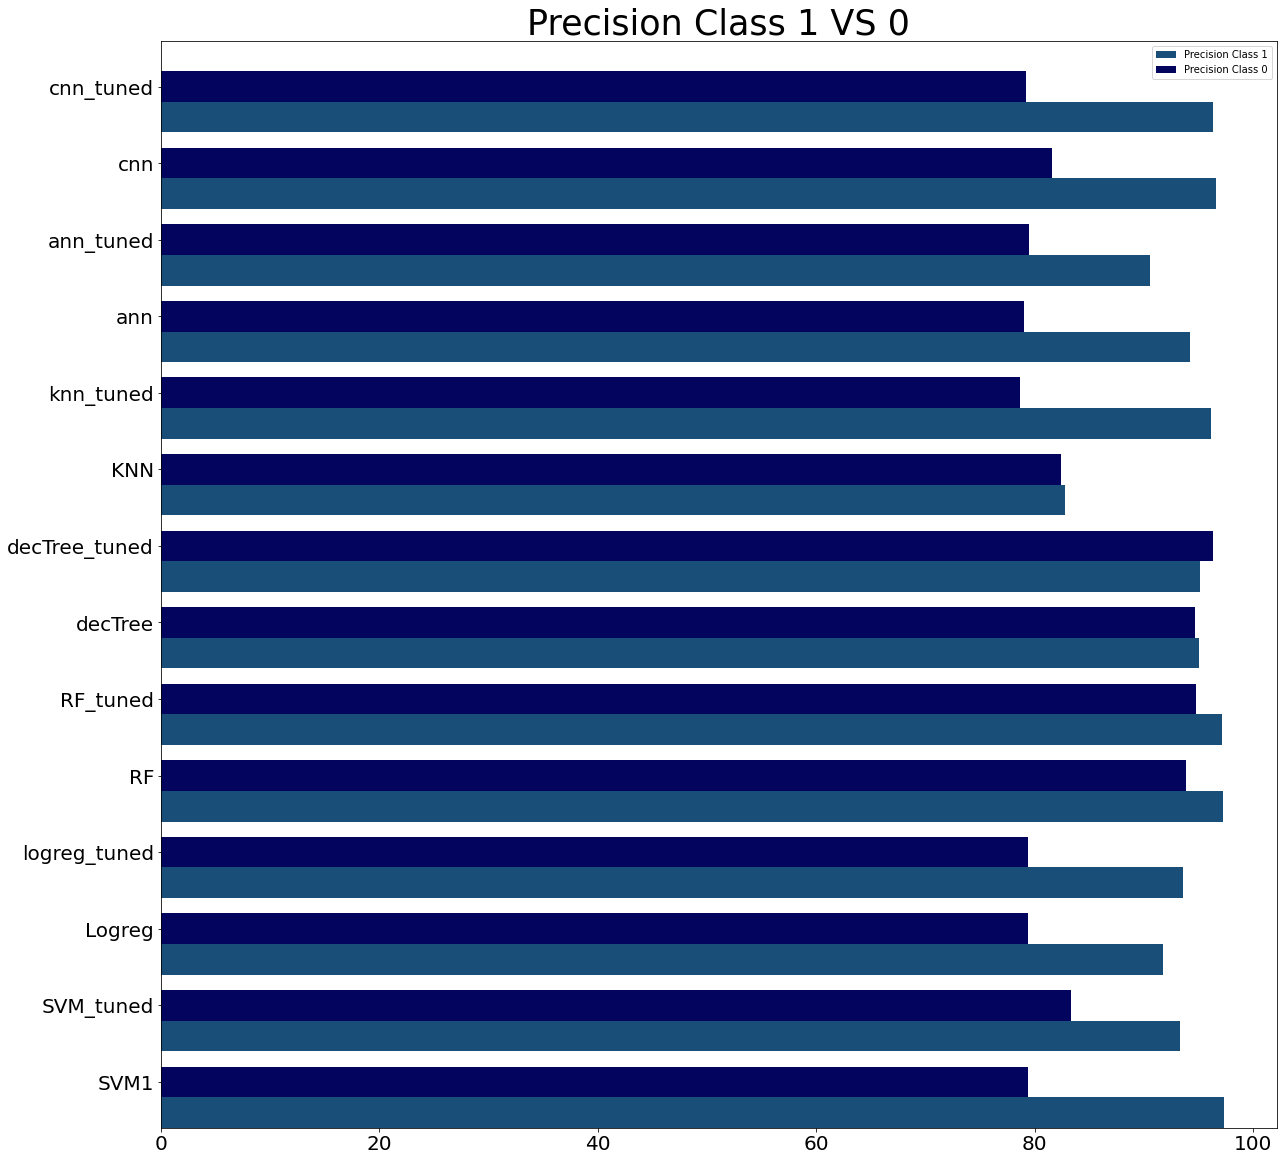

In [124]:
#horizontal bar for Precision comparison
plt.figure(figsize=(30,50))

ind = np.arange(len(scoring['algo']))
width = 0.4

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(ind, scoring['prec1'], width, color='#184e77', label='Precision Class 1')
ax.barh(ind + width, scoring['prec0'], width, color='#03045e', label='Precision Class 0')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.legend()
plt.title('Precision Class 1 VS 0', fontsize=35)
plt.show()

# Recall

<Figure size 2160x3600 with 0 Axes>

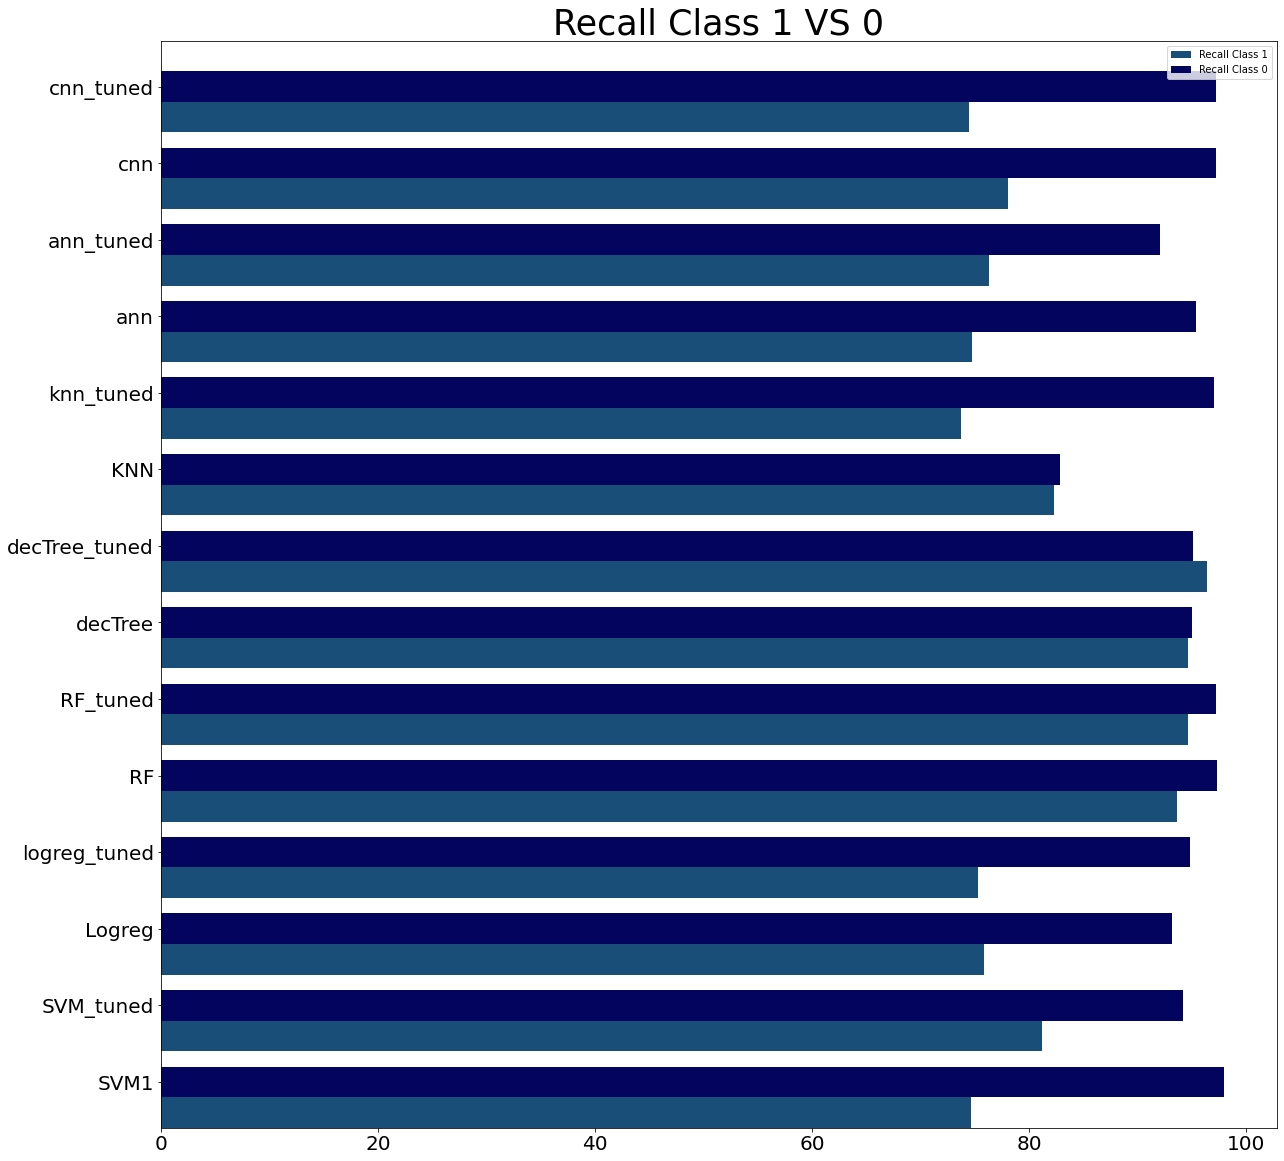

In [125]:
#horizontal bar for recall comparison
plt.figure(figsize=(30,50))

ind = np.arange(len(scoring['algo']))
width = 0.4

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(ind, scoring['recall1'], width, color='#184e77', label='Recall Class 1')
ax.barh(ind + width, scoring['recall0'], width, color='#03045e', label='Recall Class 0')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.legend()
plt.title('Recall Class 1 VS 0', fontsize=35)
plt.show()

# ROC AUC

<Figure size 2160x3600 with 0 Axes>

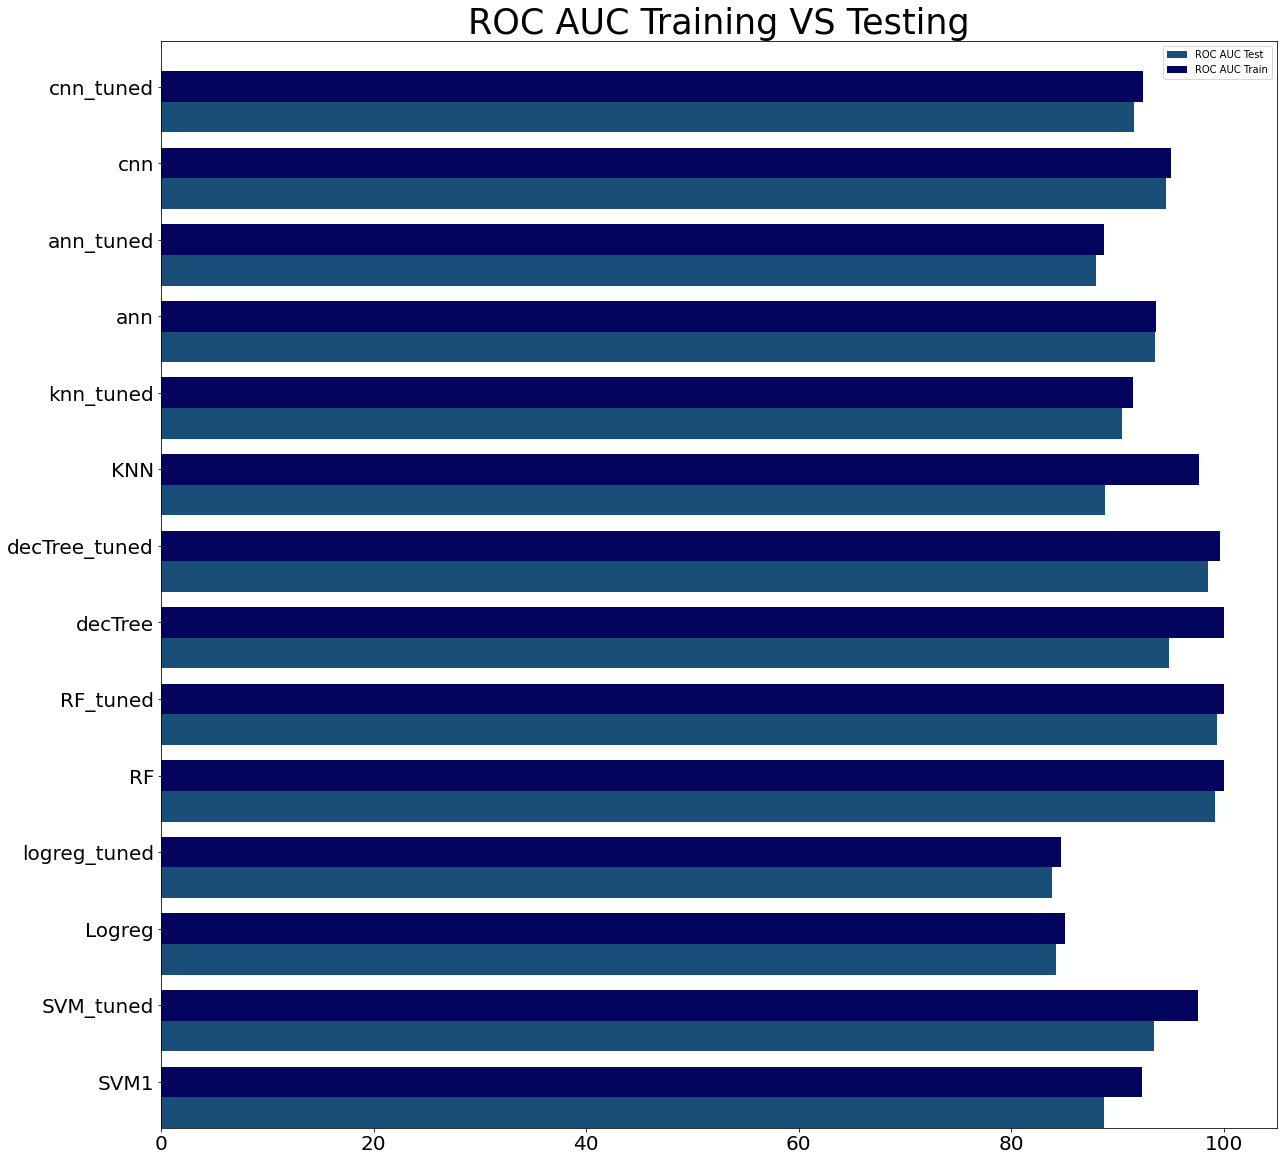

In [126]:
#horizontal bar for ROC_AUC comparison
plt.figure(figsize=(30,50))

ind = np.arange(len(scoring['algo']))
width = 0.4

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(ind, scoring['roctest'], width, color='#184e77', label='ROC AUC Test')
ax.barh(ind + width, scoring['roctrain'], width, color='#03045e', label='ROC AUC Train')

ax.set(yticks=ind + width, yticklabels=scoring['algo'], ylim=[2*width - 1, len(scoring['algo'])])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax.legend()
plt.title('ROC AUC Training VS Testing', fontsize=35)
plt.show()

# Conclusion:


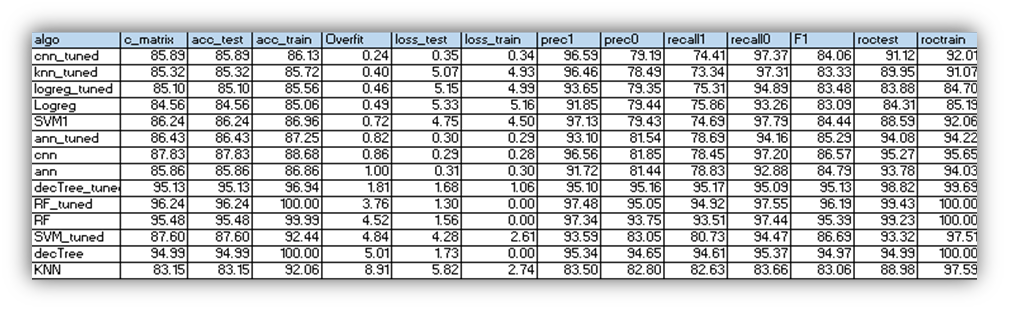

Seven algorithms from Machine Learning and Deep Learning were conducted to determine the most predictive classifier for credit card fraud detection. These projects constructed from two datasets and combine into one, with extreme imbalance classification problems that solved using Imblearn’s Random Under Sampling to make the class is balanced. Some models have a high accuracy score; however, the overfitting cannot be avoided. For example, Decision Tree and Random Forest have a high accuracy score of more than 90% yet their overfitting percentage is almost 5%. In contrast to Decision Tree and Random Forest, KNN has the lowest accuracy score which is 83.15% and the overfitting percentage is the highest with 8.91%.

Hyperparameter tuning and K-Fold cross-validation are applied to cope with the overfitting problem and to improve the accuracy. As a result, the overfit in KNN dropped from 8.91% to 0.40% by increasing the number of Neighbour and some changes in the parameters, the accuracy score is also increased around 2% to 85.32%. Similar to KNN, the overfitting percentage also reduced from 5.01% to 1.81% for the Decision Tree and the accuracy score is slightly rise.

For future benefits, we selected three algorithms with the lowest percentage of overfitting as they will generalise well to new data. If the model can generalise the data well, it also could perform the classification or prediction task that was intended for. Consequently, we picked KNN, Logistic Regression, and Convolutional Neural Networks as our final algorithm for the credit card fraud detection problem.
